<a href="https://colab.research.google.com/github/qtuter1997/Covid-coughs/blob/main/EDA_data_AICovidVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/AICovidVN 115M Challenge_ Covid Cough Detection Challenge results

/content/drive/MyDrive/Colab Notebooks/AICovidVN 115M Challenge_ Covid Cough Detection Challenge results


#Exploratory data analysis

The competition database


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd

In [ ]:
train_file_path = 'dataset/aicv115m_public_train/train_audio_files_8k/'
# validation_file_path
test_file_path = 'dataset/aicv115m_public_test/test_audio_files_8k/'

In [ ]:
data_frame_train = pd.read_csv('dataset/aicv115m_public_train/metadata_train_challenge.csv')
data_frame_test = pd.read_csv('dataset/aicv115m_public_test/metadata_public_test.csv')

In [ ]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               1199 non-null   object 
 1   subject_gender     691 non-null    object 
 2   subject_age        646 non-null    float64
 3   assessment_result  1199 non-null   int64  
 4   file_path          1199 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 47.0+ KB


In [ ]:
data_frame_train.head()

,uuid,subject_gender,subject_age,assessment_result,file_path
0,3284bcf1-2446-4f3a-ac66-14c76b294177,male,23.0,0,3284bcf1-2446-4f3a-ac66-14c76b294177.wav
1,431334e1-5946-4576-bb51-8e342ccc22b4,NaN,NaN,0,431334e1-5946-4576-bb51-8e342ccc22b4.wav
2,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1,NaN,NaN,0,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1.wav
3,c7ee0695-b2e7-4beb-b904-f1455c9609d9,male,49.0,0,c7ee0695-b2e7-4beb-b904-f1455c9609d9.wav
4,dd541704-b696-4181-8fd8-816daac0fcf9,NaN,NaN,0,dd541704-b696-4181-8fd8-816daac0fcf9.wav


In [ ]:
df = data_frame_train.iloc[:,[0,3,4]]
df.head()

,uuid,assessment_result,file_path
0,3284bcf1-2446-4f3a-ac66-14c76b294177,0,3284bcf1-2446-4f3a-ac66-14c76b294177.wav
1,431334e1-5946-4576-bb51-8e342ccc22b4,0,431334e1-5946-4576-bb51-8e342ccc22b4.wav
2,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1,0,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1.wav
3,c7ee0695-b2e7-4beb-b904-f1455c9609d9,0,c7ee0695-b2e7-4beb-b904-f1455c9609d9.wav
4,dd541704-b696-4181-8fd8-816daac0fcf9,0,dd541704-b696-4181-8fd8-816daac0fcf9.wav


0    737
1    462
Name: assessment_result, dtype: int64


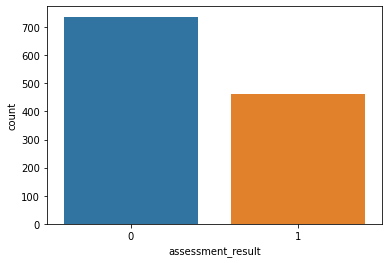

In [ ]:
print(df['assessment_result'].value_counts())
sns.countplot(data=df,x='assessment_result')

#Preprocessing data
**Loading data**

First step, we're loading and preprocessing data. We're dividing soud.

In [ ]:
train_data = []
dur = []
indexes = len(df['file_path'])
for index in tqdm(range(indexes)):
  x , sr = librosa.load(train_file_path + data_frame_train['file_path'][index])
  duration = len(x)/sr
  dur.append(duration)

100%|██████████| 1199/1199 [08:00<00:00,  2.49it/s]


In [ ]:
df['duration'] = dur
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,uuid,assessment_result,file_path,duration
0,3284bcf1-2446-4f3a-ac66-14c76b294177,0,3284bcf1-2446-4f3a-ac66-14c76b294177.wav,5.717415
1,431334e1-5946-4576-bb51-8e342ccc22b4,0,431334e1-5946-4576-bb51-8e342ccc22b4.wav,9.780000
2,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1,0,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1.wav,2.280000
3,c7ee0695-b2e7-4beb-b904-f1455c9609d9,0,c7ee0695-b2e7-4beb-b904-f1455c9609d9.wav,4.272517
4,dd541704-b696-4181-8fd8-816daac0fcf9,0,dd541704-b696-4181-8fd8-816daac0fcf9.wav,4.680000


In [ ]:
# df.to_csv('data_train_new.csv')

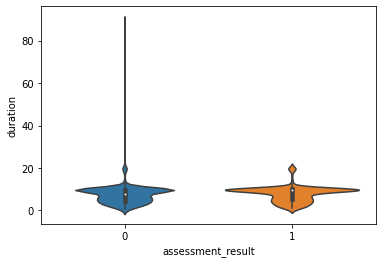

In [ ]:
sns.violinplot(data=df,x='assessment_result', y='duration', split=True)

**Listening to the sample**

,uuid,assessment_result,file_path,duration
528,40d8a508-d158-45bb-a4a4-647186421384,1,40d8a508-d158-45bb-a4a4-647186421384.wav,9.78


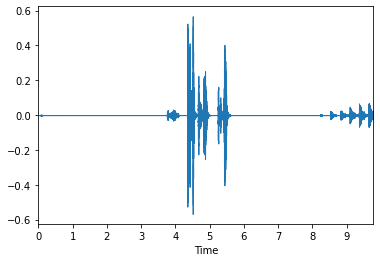

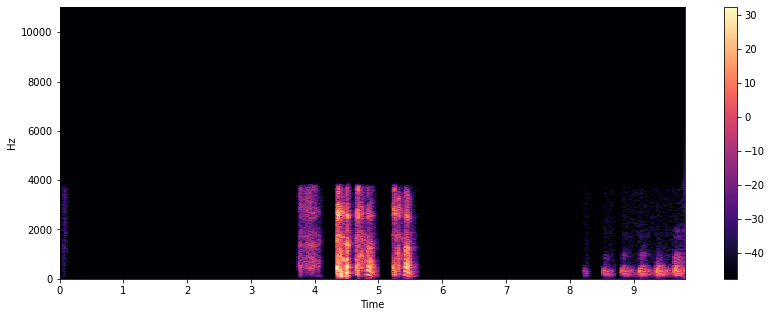

In [ ]:
# Select one random pos sample
sample = df[df['assessment_result']==1].sample()
sample_audio_path = sample.iloc[0]['file_path']
display(sample)

x , sr = librosa.load(train_file_path + sample_audio_path)
librosa.display.waveplot(x, sr=sr)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

ipd.Audio(train_file_path+sample_audio_path)

,uuid,assessment_result,file_path,duration
37,0ec77505-3c54-46e0-b059-ab8eb1673ba8,0,0ec77505-3c54-46e0-b059-ab8eb1673ba8.wav,9.72


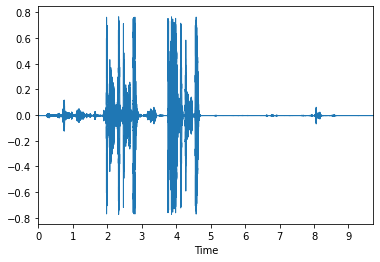

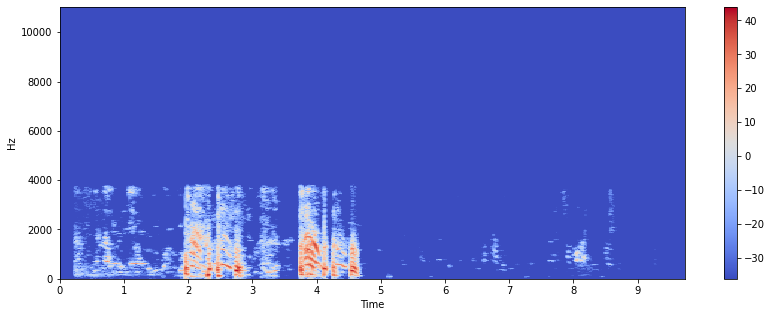

In [ ]:
# Select one random neg sample
sample = df[df['assessment_result']==0].sample()
sample_audio_path = sample.iloc[0]['file_path']
# sr = sample.iloc[0]['Sample rate']
display(sample)

x , sr = librosa.load(train_file_path + sample_audio_path)
librosa.display.waveplot(x, sr=sr)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

ipd.Audio(train_file_path+sample_audio_path)

In [ ]:
# pip install efficientnet_pytorch

In [ ]:
# from efficientnet_pytorch import EfficientNet

In [ ]:
# import torch
# from torch import nn

# print(torch.cuda.device_count())
# print(torch.cuda.get_device_name(0))

1
Tesla T4


In [ ]:
# mdl = EfficientNet.from_pretrained('efficientnet-b7')

In [ ]:
# !nvcc —-version

nvcc fatal   : Don't know what to do with '—-version'
